# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

Provides census data for all tracks 

The Diabetes Dataset can be found here for download at this link.

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

#read in the happiness spreadsheet 

In [37]:
diabetes= "diabetes.csv"

In [38]:
import pandas as pd
import sklearn
import numpy as np 

In [39]:
#use pandas to read in the data files since its csv
diabetes_df= pd.read_csv(diabetes, sep=',', header=0)

## 4) Show me the head of your data.

In [40]:
#show the head for the diabetes dataset

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## 5) Show me the shape of your data

In [41]:
#show the shpe of the dataset
print(diabetes_df.shape)

(2000, 9)


## 6) Show me the proportion of missing observations for each column of your data

In [42]:
#show the mssing observations in each column of the happiness dataset 
diabetes_df.dropna().isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

## 7) Initial data explortion of the breast cancer data 

### Can we predict the outcome of diabetes from the BMI of the patients?

##Is there a correlation between the Glucose and the Blood pressure in predicting the patients with diabetes? 

In [44]:
#load in the necesary packages 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler,label_binarize
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, learning_curve, cross_val_score, KFold, GridSearchCV,train_test_split
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


In [45]:
#use the seaborn dataset to visualize the relationships
import seaborn as sns

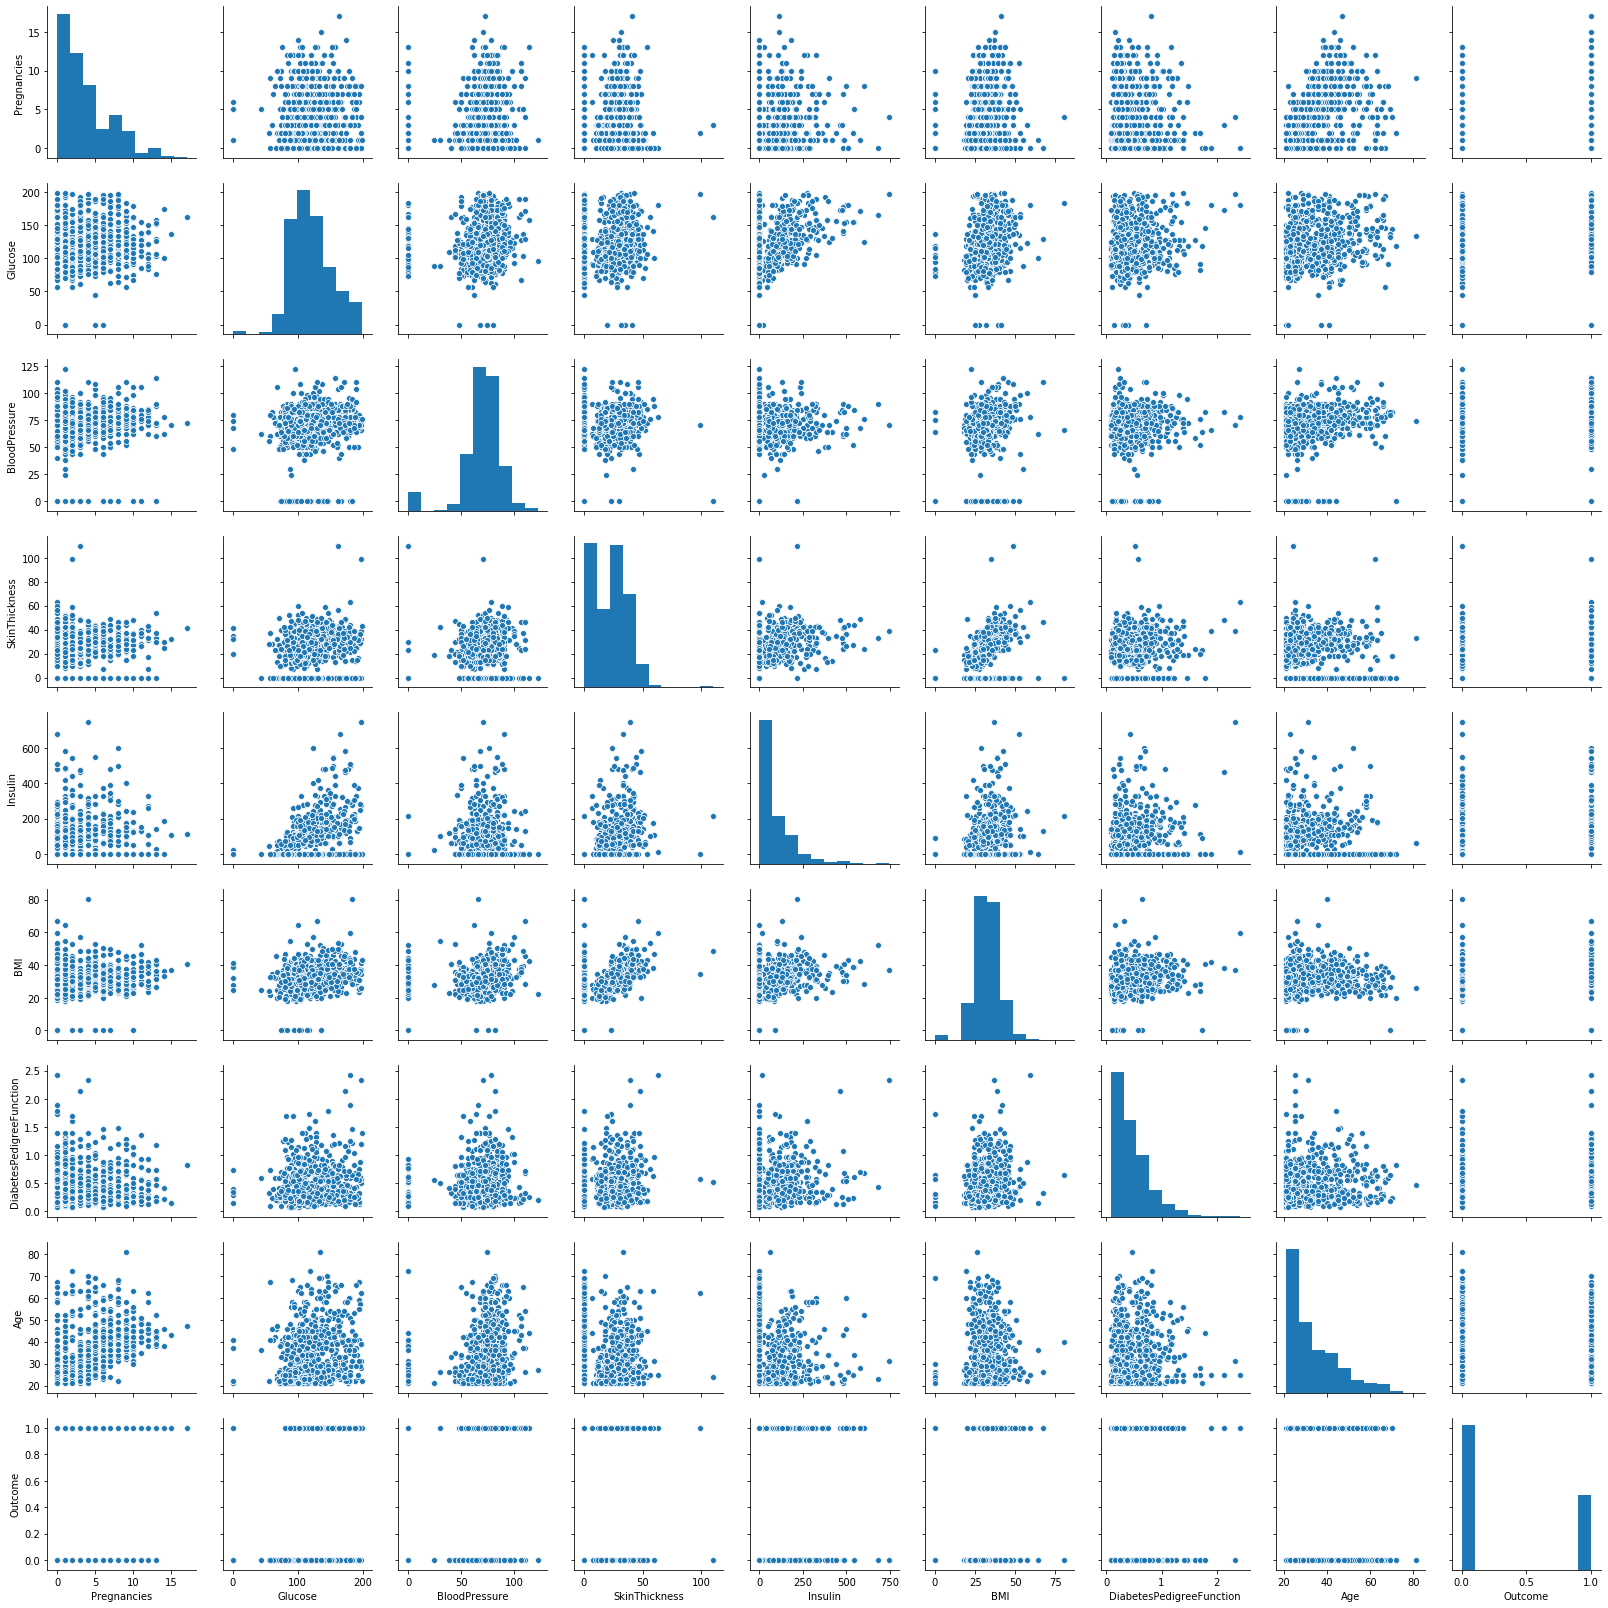

In [12]:
sns.pairplot(diabetes_df)

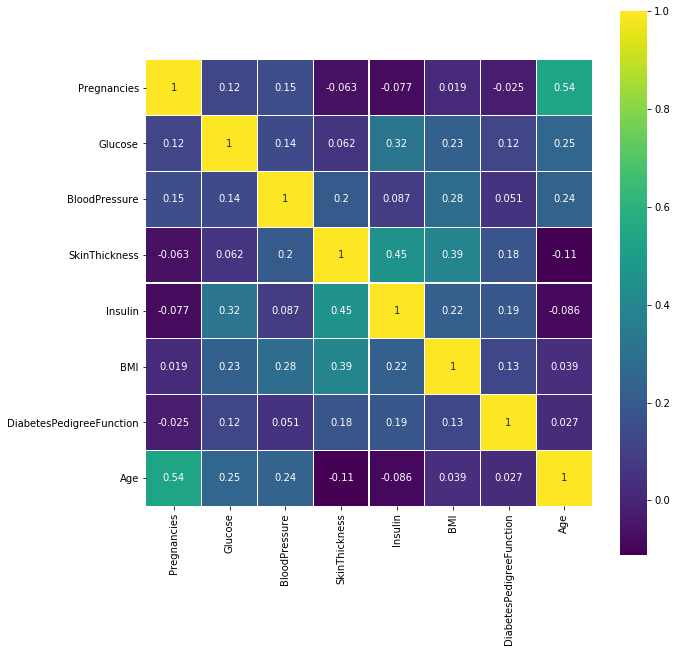

In [20]:
#heatmap indicating the correlatioin between outcome and the other factors  
colormap= plt.cm.viridis
plt.figure(figsize= (10,10))
sns.heatmap(diabetes_df.astype(float).drop(axis=1, labels='Outcome').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

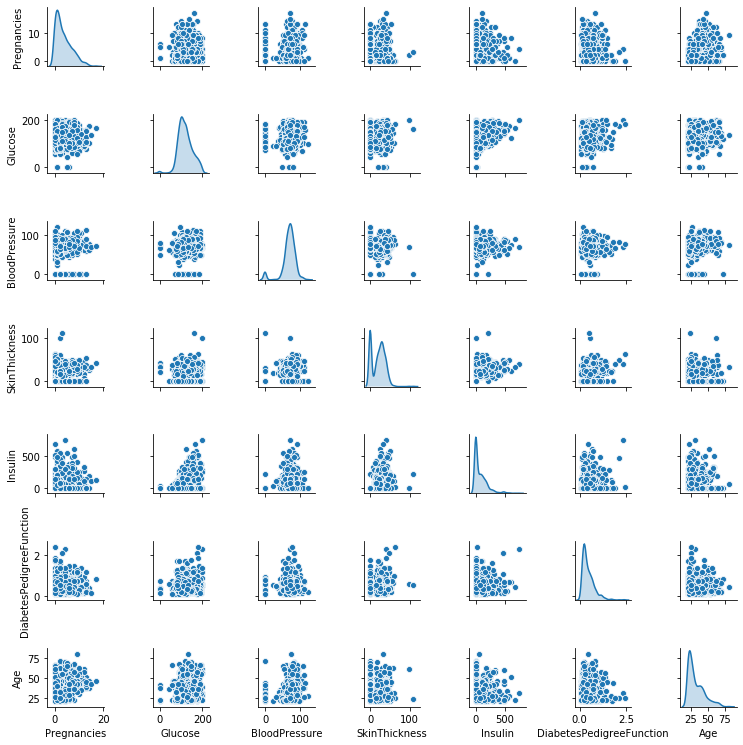

In [23]:
sns.pairplot(diabetes_df.drop(['Outcome', 'BMI'], axis=1),size=1.5, diag_kind='kde')


In [48]:
#assign all the columsn except for the outcome to the data matrix
X= diabetes_df.drop('Outcome', axis=1)
#assign the outcome to the target matrix for predictions 
y= diabetes_df['Outcome']

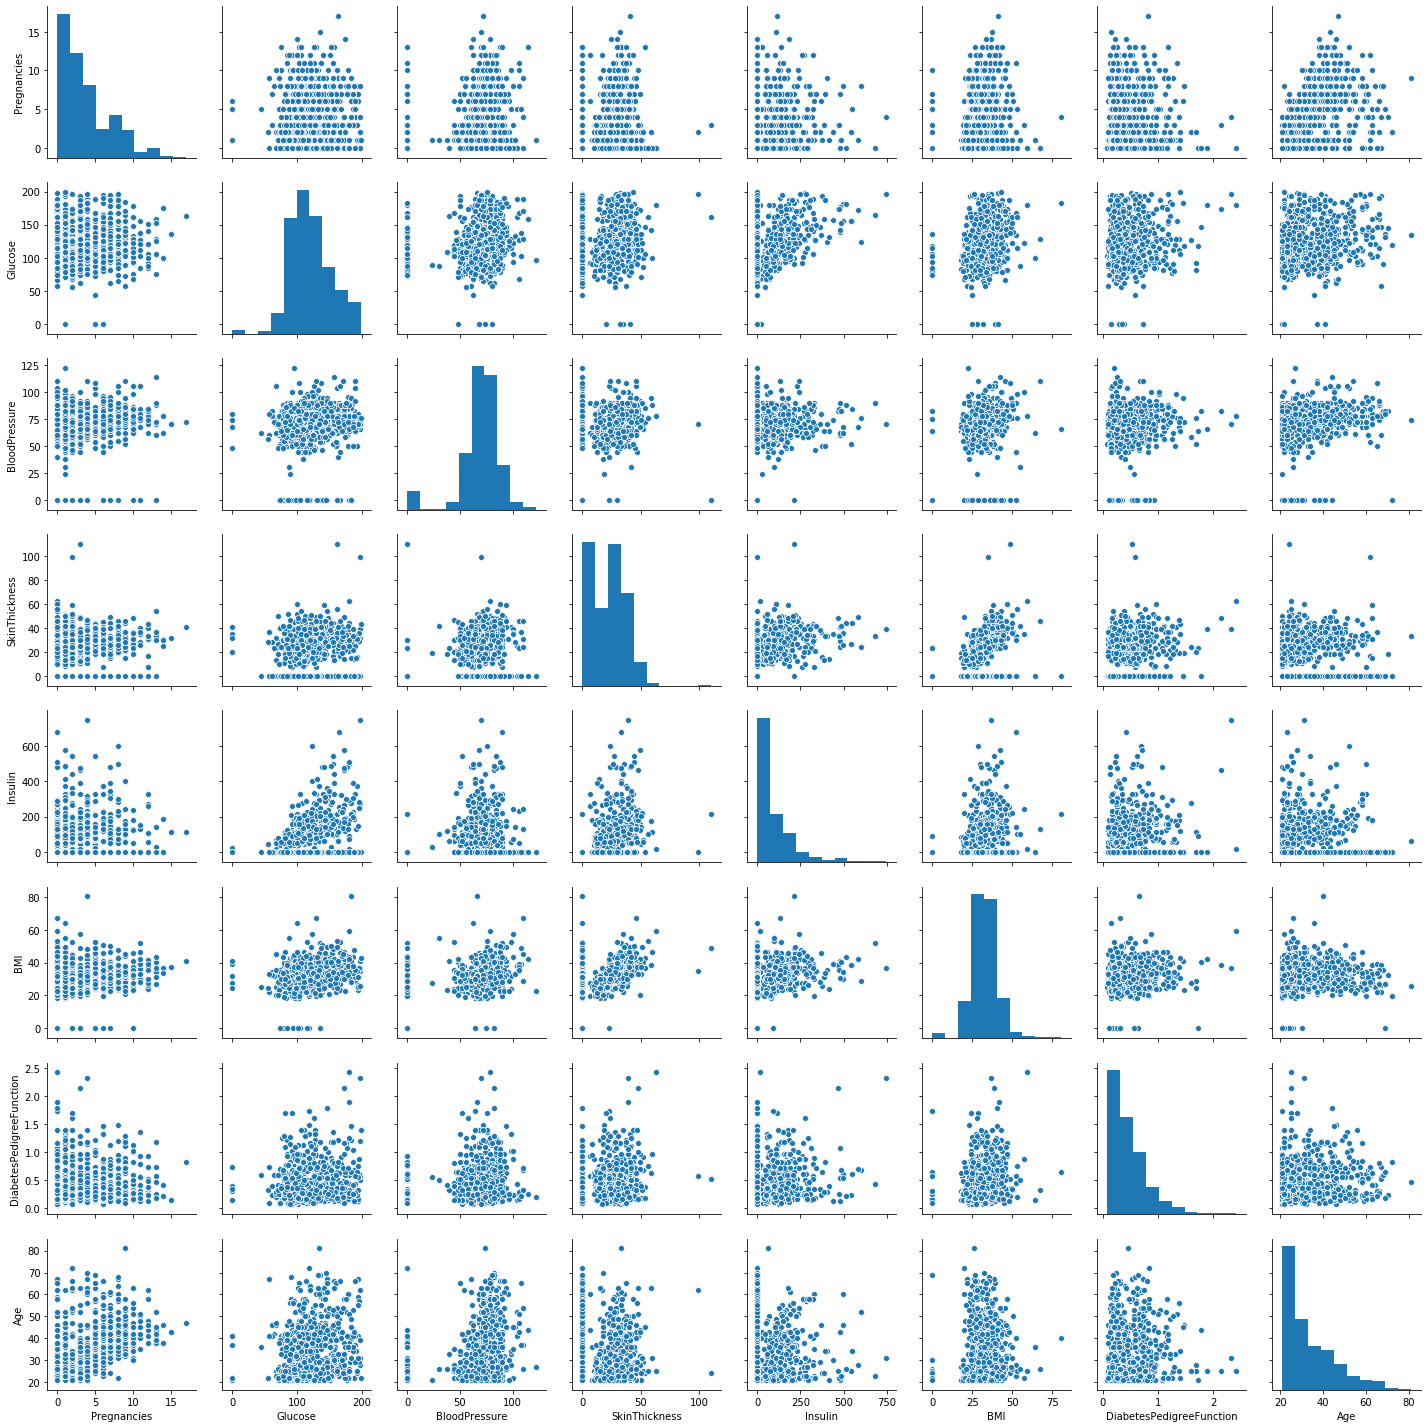

In [47]:
#now we can look at the individual components in relation to x and y 
sns.pairplot(X)

In [49]:
sns.pairplot(y)

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

Pairwise distances:


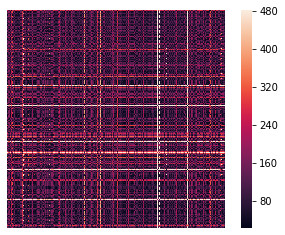

In [11]:
#look at the shape of X
D = sklearn.metrics.pairwise_distances(X, metric='euclidean', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()


In [9]:
#can we see if this is parametric data
plt.hist(np.hstack(D), 20, facecolor='purple', alpha=0.75)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

NameError: name 'D' is not defined

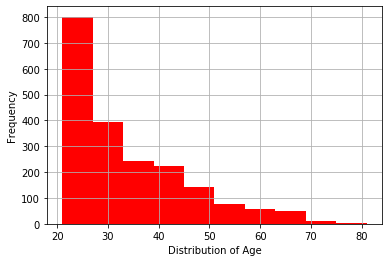

In [14]:
#plot the correlation between Age
plt.hist(diabetes_df["Age"], facecolor= 'red')
plt.xlabel('Distribution of Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

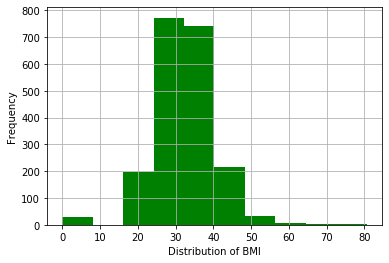

In [30]:
#plot the correlation between BMI
plt.hist(diabetes_df["BMI"], facecolor= 'green')
plt.xlabel('Distribution of BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
#train test split function

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


In [36]:
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
#model = LinearRegression()
model = K(n_neighbors=2)
plot_learning_curve(model, title, X, y, cv=cv_iterator, n_jobs=4)
#if we change neighbors to 1- the training set is good but 
plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_neighbors'

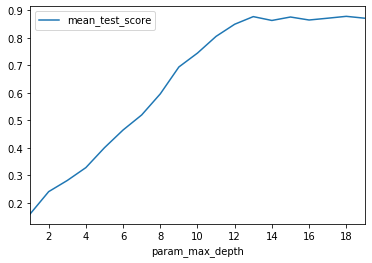

In [13]:
#knn progression
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
dt = DecisionTreeRegressor()
# Create grid search instance 
#gscv = GridSearchCV(dt, {"max_depth": range(1, 200)}, cv=kf, n_jobs=-1)#we don't wanna grow the tree this much 
gscv = GridSearchCV(dt, {"max_depth": range(1, 20)}, cv=kf, n_jobs=-1)
gscv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Get k values versus mean_test_scores
cv_df.plot.line(x="param_max_depth", y="mean_test_score");

In [17]:
gscv.best_params_

{'max_depth': 18}

In [18]:
#make predictions based on the new values
gscv.best_estimator_ #make predictions on the new values 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=18,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
cv_df("rank_test_score", ascending=True) #look at the parameters being used 

TypeError: 'DataFrame' object is not callable

In [20]:
#establish your training data 
X_train= X[:200]
test_X= X[200:]
y_train=y[:200]
test_y=y[200:]

In [25]:
#establish a linear regression model 
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
lr_regr = linear_model.LinearRegression()
#fit the training data
lr_regr.fit(X_train, y_train)

#make predictions with these testing sites
#using the linear regression model 
pred_diabetes=lr_regr.predict(test_X)
score= lr_regr.score(test_X, test_y)

In [27]:

print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(test_y, pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(test_y, pred_diabetes))
print('Score: %.2f' % lr_regr.score(test_X, test_y))

LRr_Coefficients:  [ 2.00788647e-02  3.98653025e-03 -1.83215055e-03  5.26157145e-04
 -1.60925168e-04  1.43528251e-02  1.90143971e-01  3.04592385e-03]
LR_Mean Square Error: 0.16
LR_Variance score: 0.27
Score: 0.27


In [34]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
dtr = DecisionTreeRegressor(max_depth=5)

# Fit
dtr.fit(X_train, y_train)

# Predict
y_predicted = dtr.predict(test_X)

sns.scatterplot(test_X, y_test)
sns.scatterplot(test_X, y_predicted)


# Test
mean_squared_error(test_y, y_predicted)



KeyError: (Ellipsis, 200)

In [ ]:
#clustering 

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

In [8]:
#split the datrame based off malignant or benign 
print("X dimensionality", X.shape)
print("y Dimensionality", y.shape)

X dimensionality (2000, 8)
y Dimensionality (2000,)
